In [1]:
%matplotlib inline


# Wasserstein Discriminant Analysis


This example illustrate the use of WDA as proposed in [11].


[11] Flamary, R., Cuturi, M., Courty, N., & Rakotomamonjy, A. (2016).
Wasserstein Discriminant Analysis.




In [2]:
# Author: Remi Flamary <remi.flamary@unice.fr>
#
# License: MIT License

import numpy as np
import matplotlib.pylab as pl

from ot.dr import wda, fda

/home/rflamary/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Generate data
-------------



In [3]:
#%% parameters

n = 1000  # nb samples in source and target datasets
nz = 0.2

# generate circle dataset
t = np.random.rand(n) * 2 * np.pi
ys = np.floor((np.arange(n) * 1.0 / n * 3)) + 1
xs = np.concatenate(
    (np.cos(t).reshape((-1, 1)), np.sin(t).reshape((-1, 1))), 1)
xs = xs * ys.reshape(-1, 1) + nz * np.random.randn(n, 2)

t = np.random.rand(n) * 2 * np.pi
yt = np.floor((np.arange(n) * 1.0 / n * 3)) + 1
xt = np.concatenate(
    (np.cos(t).reshape((-1, 1)), np.sin(t).reshape((-1, 1))), 1)
xt = xt * yt.reshape(-1, 1) + nz * np.random.randn(n, 2)

nbnoise = 8

xs = np.hstack((xs, np.random.randn(n, nbnoise)))
xt = np.hstack((xt, np.random.randn(n, nbnoise)))

Plot data
---------



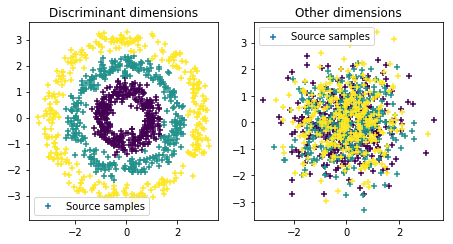

In [4]:
#%% plot samples
pl.figure(1, figsize=(6.4, 3.5))

pl.subplot(1, 2, 1)
pl.scatter(xt[:, 0], xt[:, 1], c=ys, marker='+', label='Source samples')
pl.legend(loc=0)
pl.title('Discriminant dimensions')

pl.subplot(1, 2, 2)
pl.scatter(xt[:, 2], xt[:, 3], c=ys, marker='+', label='Source samples')
pl.legend(loc=0)
pl.title('Other dimensions')
pl.tight_layout()

Compute Fisher Discriminant Analysis
------------------------------------



In [5]:
#%% Compute FDA
p = 2

Pfda, projfda = fda(xs, ys, p)

Compute Wasserstein Discriminant Analysis
-----------------------------------------



In [6]:
#%% Compute WDA
p = 2
reg = 1e0
k = 10
maxiter = 100

Pwda, projwda = wda(xs, ys, p, reg, k, maxiter=maxiter)

Compiling cost function...
Computing gradient of cost function...
 iter		   cost val	    grad. norm
    1	+8.1744675052927340e-01	5.18943290e-01
    2	+4.6574082332790778e-01	1.98300827e-01
    3	+4.4912307637701449e-01	1.38157890e-01
    4	+4.4030490938831912e-01	7.00834944e-02
    5	+4.3780885707533013e-01	4.35903168e-02
    6	+4.3753767094086027e-01	5.81158060e-02
    7	+4.3658534767678403e-01	4.44189462e-02
    8	+4.3516262357849916e-01	4.15971448e-02
    9	+4.3332622549435446e-01	7.82365182e-02
   10	+4.2847338855201011e-01	5.28789263e-02
   11	+4.1510883118208680e-01	6.83664317e-02
   12	+4.1332168544999542e-01	1.01013343e-01
   13	+4.0818672134323475e-01	5.07935089e-02
   14	+4.0502824759368472e-01	9.56110665e-02
   15	+3.9786250825732905e-01	6.68177888e-02
   16	+3.5518514892526853e-01	2.01958719e-01
   17	+2.5048183658126072e-01	1.82260477e-01
   18	+2.4055179583813954e-01	1.48301002e-01
   19	+2.2127351995549377e-01	1.77690944e-02
   20	+2.2106865089529223e-01	6.44501056e-03


Plot 2D projections
-------------------



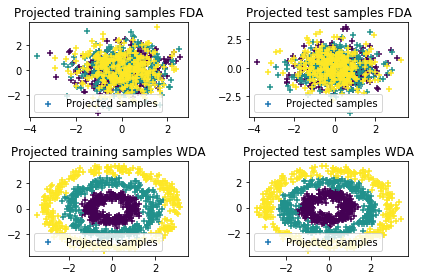

In [7]:
#%% plot samples

xsp = projfda(xs)
xtp = projfda(xt)

xspw = projwda(xs)
xtpw = projwda(xt)

pl.figure(2)

pl.subplot(2, 2, 1)
pl.scatter(xsp[:, 0], xsp[:, 1], c=ys, marker='+', label='Projected samples')
pl.legend(loc=0)
pl.title('Projected training samples FDA')

pl.subplot(2, 2, 2)
pl.scatter(xtp[:, 0], xtp[:, 1], c=ys, marker='+', label='Projected samples')
pl.legend(loc=0)
pl.title('Projected test samples FDA')

pl.subplot(2, 2, 3)
pl.scatter(xspw[:, 0], xspw[:, 1], c=ys, marker='+', label='Projected samples')
pl.legend(loc=0)
pl.title('Projected training samples WDA')

pl.subplot(2, 2, 4)
pl.scatter(xtpw[:, 0], xtpw[:, 1], c=ys, marker='+', label='Projected samples')
pl.legend(loc=0)
pl.title('Projected test samples WDA')
pl.tight_layout()

pl.show()